#Exercise 4.9 - Part 2

In [1]:
# Import liabraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Project folder path as a string
path = r'/Users/Nimrat/Documents/Instacart Basket Analysis'

In [4]:
#Import the “ords_prods_custs_merge” data set into your notebook using the os library
df_ords_prods_custs_merge = pd.read_pickle(os.path.join(path, 'Prepared data', 'ords_prods_custs_merged.pkl'))

In [5]:
#Checking the output
df_ords_prods_custs_merge.shape

(32404859, 33)

#3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

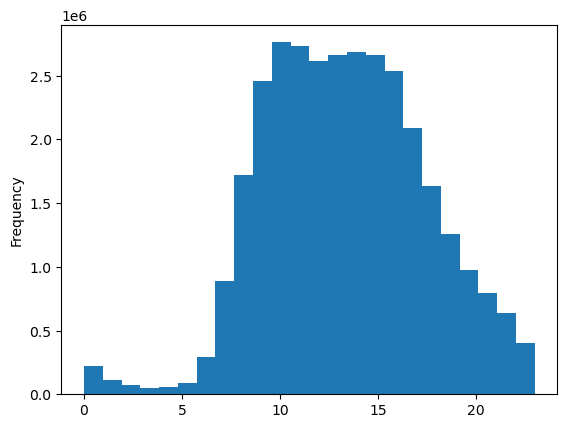

In [7]:
#Creating histogram for order_hour_of_day
hist = df_ords_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 24)

This histogram shows how many Instacart orders were placed at each hour of the day. Orders are very low during late night/early morning hours (around 0–5 AM). Order volume starts increasing in the morning (around 6–9 AM). The highest number of orders occurs between late morning and early evening (roughly 10 AM to 4 PM).

#4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

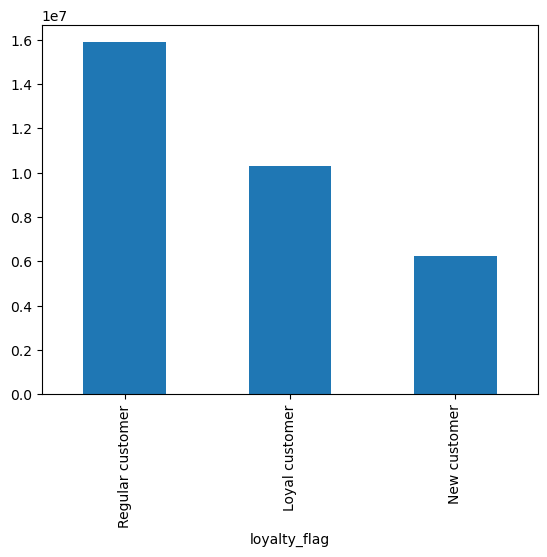

In [8]:
#Creating bar chart for loyalty flag
bar = df_ords_prods_custs_merge['loyalty_flag'].value_counts().plot.bar()

#5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
#Creating a sample of the dataframe
np.random.seed(4)

In [10]:
#Create alist holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df_ords_prods_custs_merge)) <= 0.7

In [11]:
#Store 70% of the sample in the dataframe big
big = df_ords_prods_custs_merge[dev]

In [15]:
#Store 30% of the sample in the dataframe small
small = df_ords_prods_custs_merge[~dev]

In [13]:
#Checking output
len(df_ords_prods_custs_merge)

32404859

In [16]:
len(big) + len(small)

32404859

In [17]:
#New dataframe that only contains prices and order hour of day from small subset
df_2 = small[['order_hour_of_day','prices']]

In [18]:
#Checking output
df_2

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8
...,...,...
32404841,11,13.5
32404842,20,13.5
32404843,10,13.5
32404849,9,13.5


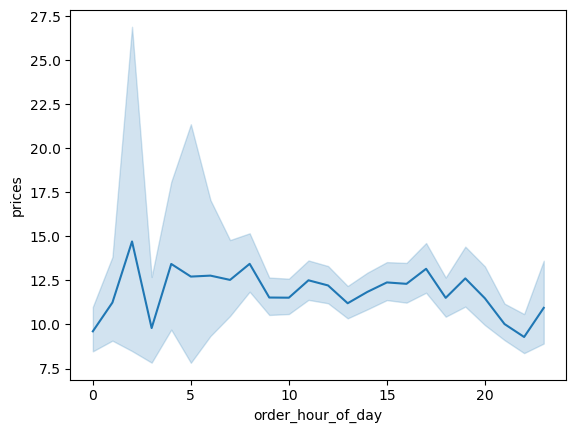

In [19]:
#Creating line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

#6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [22]:
#Creating new dataframe that only contains age and number of dependents from small subset
df_3 = small[['age','n_dependents']]

In [23]:
#Checking output
df_3

,age,n_dependents
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1
...,...,...
32404841,59,1
32404842,39,0
32404843,53,2
32404849,66,0


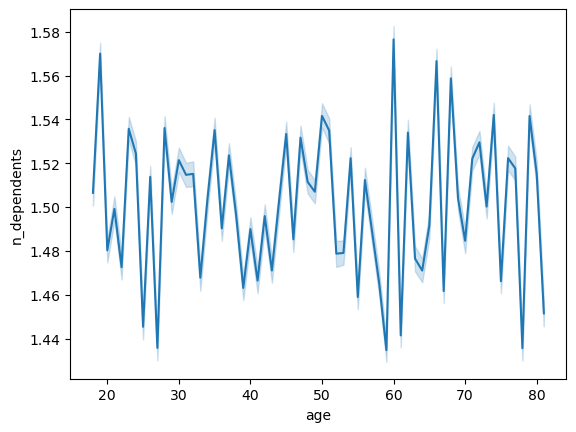

In [24]:
#Creating a line chart
line = sns.lineplot(data = df_3, x = 'age',y = 'n_dependents')

The line chart shows the relationship between age and number of dependents. Overall, the number of dependents stays very steady across all ages, staying close to about 1.5 dependents on average. There is no strong upward or downward trend, and the small zig-zags in the line are just normal variation between individual customers. This suggests that age does not strongly affect how many dependents a customer has in this dataset.

#7 You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [25]:
#Creating new dataframe that only contains age and income columns from small subset
df_4 = small[['age','income']]

In [26]:
#Checking output
df_4

,age,income
0,81,49620
2,66,158302
3,40,31308
6,20,34171
10,61,42573
...,...,...
32404841,59,118691
32404842,39,64061
32404843,53,102296
32404849,66,106393


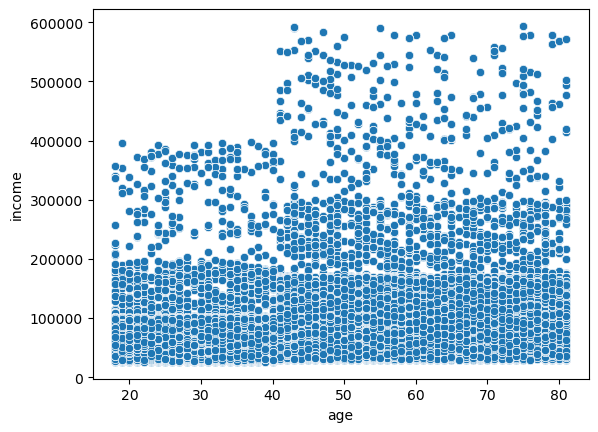

In [38]:
#Creating a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df_4)

The scatterplot shows people’s ages on the bottom and their income on the side. Each dot is one person. The dots are spread out everywhere, which means people of all ages can have low or high incomes. There is no clear pattern — income does not go up or down in a straight line with age.

In [30]:
#Exporting histogram
hist.figure.savefig(os.path.join(path, 'Visualizations', 'hist_order_hour_of_day.png'))

In [31]:
#Exporting bar chart
bar.figure.savefig(os.path.join(path, 'Visualizations', 'bar_loyalty_flag.png'))

In [32]:
#Exporting line chart for expenditure (the “prices” column) depending on the hour of the day
line.figure.savefig(os.path.join(path, 'Visualizations', 'line_prices_hour_of_day.png'))

In [34]:
#Exporting line chart for connection between age and number of dependents
line.figure.savefig(os.path.join(path, 'Visualizations', 'line_age_number_of_dependents.png'))

In [39]:
#Exporting scatterplot
scatterplot.figure.savefig(os.path.join(path, 'Visualizations', 'scatterplot_age_income.png'))